In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [10]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [9]:
df.shape

(346, 10)

# Convert to date time object 

In [13]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing

Let’s see how many of each class is in our data set 

In [14]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

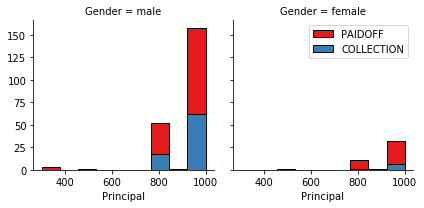

In [15]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

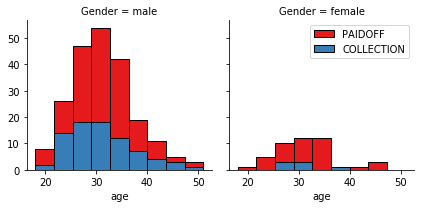

In [16]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

 # Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

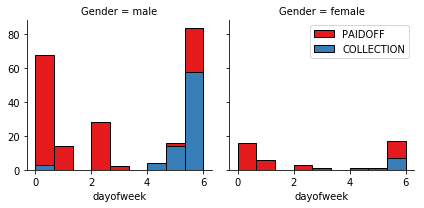

In [17]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [18]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values 

In [19]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

# One Hot Encoding  
#### How about education?

In [21]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

### Feature befor One Hot Encoding

In [22]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,male,High School or Below
1,1000,30,33,female,Bechalor
2,1000,15,27,male,college
3,1000,30,28,female,college
4,1000,30,29,male,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [27]:
Feature = df[['Principal','terms','age','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df[['Gender','education']])], axis=1)
Feature.drop(['education_Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,weekend,Gender_female,Gender_male,education_Bechalor,education_High School or Below,education_college
0,1000,30,45,0,0,1,0,1,0
1,1000,30,33,0,1,0,1,0,0
2,1000,15,27,0,0,1,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,1,0,1,0,0,1


### Feature selection

In [28]:
X = Feature
X.head()

,Principal,terms,age,weekend,Gender_female,Gender_male,education_Bechalor,education_High School or Below,education_college
0,1000,30,45,0,0,1,0,1,0
1,1000,30,33,0,1,0,1,0,0
2,1000,15,27,0,0,1,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,1,0,1,0,0,1


In [30]:
y = df['loan_status'].replace({"PAIDOFF":1,"COLLECTION":0}).values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Normalize Data

In [31]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.51578458,  0.92071769,  2.33152555, -1.20577805, -0.42056004,
         0.42056004, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, -1.20577805,  2.37778177,
        -2.37778177,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -1.20577805, -0.42056004,
         0.42056004, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  0.82934003,  2.37778177,
        -2.37778177, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.82934003, -0.42056004,
         0.42056004, -0.38170062, -0.87997669,  1.14984679]])

# Classification

#### K Nearest Neighbor(KNN) 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.model_selection import train_test_split

#### Finding best k  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


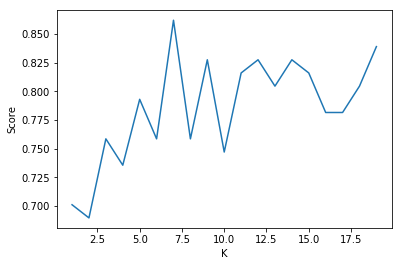

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=30)
score=[]
for i in range(1,20):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    cm=confusion_matrix(y_test,pred)
    sum=0
    for i in range(cm.shape[0]):
        sum+=cm[i,i]
    score.append(sum/x_test.shape[0])
plt.plot([i for i in range(1,20)],score)
plt.xlabel("K")
plt.ylabel("Score")
plt.show()

In [35]:
# Hence I select k=7
k=7
knn=KNeighborsClassifier(k)
knn.fit(x_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

### Decision Trees 

#### Finding best max_depth

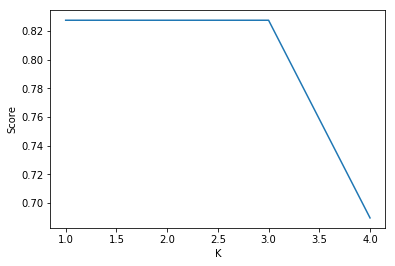

In [37]:
score_tree=[]
for i in range(1,5):
    decision_tree=DecisionTreeClassifier(max_depth=i)
    decision_tree.fit(x_train,y_train)
    pred=decision_tree.predict(x_test)
    cm=confusion_matrix(y_test,pred)
    sum=0
    for i in range(cm.shape[0]):
        sum+=cm[i,i]
    score_tree.append(sum/x_test.shape[0])
plt.plot([i for i in range(1,5)],score_tree)
plt.xlabel("K")
plt.ylabel("Score")
plt.show()

In [38]:
# Therefore it doesn't matter how many max_leaf we select the results are same since it's really a simple model 
# hence our choice is gonna be 1
max_depth=1
decision_tree=DecisionTreeClassifier(max_depth=1)

#### Fitiing model 

In [39]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Support Vector Machine 

In [40]:
svc=SVC(kernel="rbf")

In [41]:
svc.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Logistic Regression 

In [42]:
logit=LogisticRegression(C=0.001, solver='liblinear')

In [43]:
logit.fit(x_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

# Model Evaluation using Test set 

In [44]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [46]:
test_df=pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv")
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [81]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['Gender'].replace([0,1],["male","female"],inplace=True)
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

In [83]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
Feature_test = test_df[['Principal','terms','age','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df[['Gender','education']])], axis=1)
Feature_test.drop(['education_Master or Above'], axis = 1,inplace=True)
X_test=Feature_test
Y_test = test_df['loan_status'].replace({"PAIDOFF":1,"COLLECTION":0}).values

### Scaling test set 

In [84]:
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


### Predicting using the above models 

In [85]:
knn_pred=knn.predict(X_test)
decision_pred=decision_tree.predict(X_test)
svc_pred=svc.predict(X_test)
logit_pred=logit.predict(X_test)
Algo=["KNN","Decision Tree","SVM","LogisticRegression"]
clfs=[knn_pred,decision_pred,svc_pred,logit_pred]
jaccard=[]
F1=[]
Log_loss=[]

In [86]:
for i in clfs:
    jaccard.append(jaccard_similarity_score(Y_test,i))
    F1.append(f1_score(Y_test,i))
    Log_loss.append("NA")
y_prob=logit.predict_proba(X_test)
Log_loss[-1]=log_loss(Y_test,y_prob)
score_df=pd.DataFrame({"Algorithm":Algo,"Jaccard":jaccard,"F1-score":F1,"LogLoss":Log_loss})
score_df

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.685185,0.800000,NA
1,Decision Tree,0.740741,0.851064,NA
2,SVM,0.740741,0.847826,NA
3,LogisticRegression,0.759259,0.847059,0.671878


### All our models did fairly well except for KNN since it's a really small dataset 
### Best one comes out to be Logistic Regression